In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

In [2]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = np.array(train_df['label'])
x_train = np.array(train_df.drop(['label'], axis = 1))

x_test = np.array(test_df)

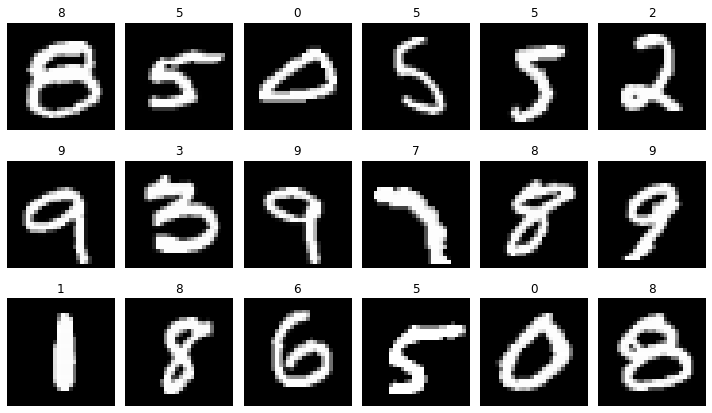

In [5]:
def plot_data(index):
    data = x_train[index].reshape((28, 28))
    label = y_train[index]

    plt.imshow(data, cmap='gray')
    plt.axis(False)
    plt.title(label)

    
rows, cols = 3, 6

plt.figure(figsize=(10, 6))
nums = random.sample(range(len(x_train)),k=rows*cols)
    

for i, num in enumerate(nums):
    plt.subplot(rows, cols, i+1)
    plot_data(num)

plt.tight_layout()
plt.show()
plt.close()

#for i in range(28) :
#    for j in range(28) :
#        print("%3d", %(x_train[0][28*i+j]), end=" ");
#    print();

In [6]:
x_train.min()

0

In [7]:
# 0 ~ 255 -> 전체 데이터 / 255 -> 0~1
x_train = x_train / 255
x_test = x_test / 255

## MLP
Multi Layered Perceptron : 다층 퍼셉트론

In [8]:
import tensorflow as tf

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout,ReLU, Softmax, BatchNormalization

In [9]:
model = Sequential([
    Input(shape = (784,)),
    Dense(50), BatchNormalization(), ReLU(), Dropout(0.2),
    Dense(50), BatchNormalization(), ReLU(), Dropout(0.2),
    Dense(10), Softmax()
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
re_lu (ReLU)                 (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 50)                0

In [11]:
y_train

# 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

array([1, 0, 1, ..., 7, 6, 9])

In [12]:
model.compile(
    optimizer="adam",#lose를 최적화시키는 알고리즘
    loss="sparse_categorical_crossentropy", #손실함수, 오차함수, 목적함수: 모델이 낸 예측값과 실제 정답이 얼마나 다른가
    metrics=["sparse_categorical_accuracy"] #평가 지표
)

In [13]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
525/525 [==============================] - 3s 4ms/step - loss: 1.0164 - sparse_categorical_accuracy: 0.6916 - val_loss: 0.2513 - val_sparse_categorical_accuracy: 0.9251
Epoch 2/30
525/525 [==============================] - 1s 3ms/step - loss: 0.3459 - sparse_categorical_accuracy: 0.8965 - val_loss: 0.1952 - val_sparse_categorical_accuracy: 0.9399
Epoch 3/30
525/525 [==============================] - 2s 3ms/step - loss: 0.2741 - sparse_categorical_accuracy: 0.9159 - val_loss: 0.1567 - val_sparse_categorical_accuracy: 0.9525
Epoch 4/30
525/525 [==============================] - 2s 3ms/step - loss: 0.2440 - sparse_categorical_accuracy: 0.9234 - val_loss: 0.1424 - val_sparse_categorical_accuracy: 0.9576
Epoch 5/30
525/525 [==============================] - 2s 3ms/step - loss: 0.2260 - sparse_categorical_accuracy: 0.9310 - val_loss: 0.1388 - val_sparse_categorical_accuracy: 0.9561
Epoch 6/30
525/525 [==============================] - 1s 3ms/step - loss: 0.1969 - sparse_categorica

In [14]:
train_loss = history.history['loss']
train_acc = history.history['sparse_categorical_accuracy']

valid_loss = history.history['val_loss']
valid_acc = history.history['val_sparse_categorical_accuracy']

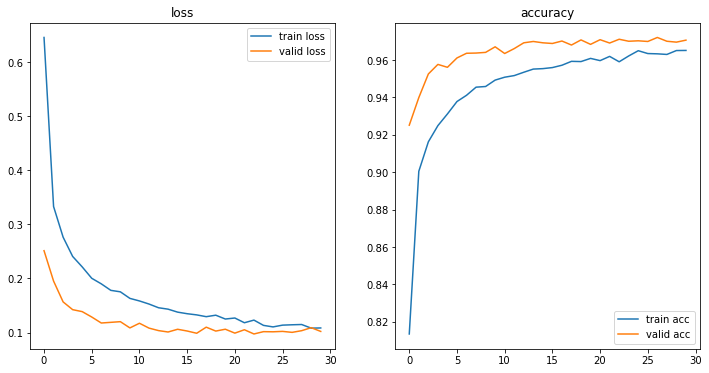

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.plot(train_loss, label='train loss')
plt.plot(valid_loss, label= 'valid loss')
plt.title("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train acc')
plt.plot(valid_acc, label='valid acc')
plt.title('accuracy')
plt.legend()

plt.show()
plt.close()

In [16]:
predictions = model.predict(x_test)

In [17]:
pred = np.argmax(predictions, axis=1)

In [18]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [19]:
sub = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sub['Label'] = pred

In [20]:
sub.to_csv('mnist-20210208.csv', index=False)